# MAIN NOTEBOOK
Create subsections for different phases of the project (i.e., 'Exploratory Data Analysis', 'Feature Engineering', etc.).  Create a .py file with functions to import for whatever you need.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as skl

### Configuration

In [2]:
# Jupyter Notebook config: automatically reload modules when code is changed
%load_ext autoreload
%autoreload 2

# Pandas config: show all columns and rows
# Note: Use df.head(n: int) or df.tail(n: int) to show only the first or last n rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib config: set default figure size
plt.rcParams['figure.figsize'] = [20, 10]

# Seaborn config: set default figure size
sns.set(rc={'figure.figsize':(20,10)})

# Plotly config: set default figure size
px.defaults.width = 1200
px.defaults.height = 800

# Numpy config: set random seed for reproducibility
np.random.seed(42)

In [3]:
# Loading in core data, make sure to use dataset.copy() for any data manipulation
dataset = pd.read_csv('./data/dataset.csv')
dataset.head(10)

,Symbol,Date,Open,High,Low,Close,Volume
0,A,2009-03-02 05:00:00,9.73,9.80,9.02,9.07,5994808
1,A,2009-03-03 05:00:00,9.22,9.34,8.88,9.07,7057671
2,A,2009-03-04 05:00:00,9.24,9.70,9.11,9.52,5427775
3,A,2009-03-05 05:00:00,9.28,9.46,8.95,8.97,9678690
4,A,2009-03-06 05:00:00,8.91,9.36,8.60,9.05,6800559
5,A,2009-03-09 04:00:00,8.94,9.28,8.83,8.90,6017432
6,A,2009-03-10 04:00:00,9.09,9.64,9.03,9.61,6584299
7,A,2009-03-11 04:00:00,9.70,9.99,9.58,9.68,5358247
8,A,2009-03-12 04:00:00,9.63,9.94,9.34,9.88,5116577
9,A,2009-03-13 04:00:00,9.91,10.11,9.86,10.01,3648401


## Exploratory Data Analysis

### Pre-cleaning Visualizing/Analysis 

In [84]:
# Note: Unzip the raw_data.zip file in the data folder before running this cell
# Visualize the yearly distribution of stock information
from eda import plot_year_distribution
plot = plot_year_distribution('./data/unprocessed/')
plot.show()

In [85]:
# Visualize how much of the data is complete within the time range
from eda import plot_data_viability
plot = plot_data_viability('./data/unprocessed/')
plot.show()

### Post-Cleaning Visualizing/Analysis

In [110]:
# Copy the dataset for data manipulation
data = dataset.copy()
# Add sector and industry information to the dataset
from eda import add_sector_and_industry
data = add_sector_and_industry(data)
data.head(10)

,Symbol,Date,Open,High,Low,Close,Volume,Sector,Industry
0,A,2009-03-02 05:00:00,9.73,9.80,9.02,9.07,5994808,Industrials,Electrical Products
1,A,2009-03-03 05:00:00,9.22,9.34,8.88,9.07,7057671,Industrials,Electrical Products
2,A,2009-03-04 05:00:00,9.24,9.70,9.11,9.52,5427775,Industrials,Electrical Products
3,A,2009-03-05 05:00:00,9.28,9.46,8.95,8.97,9678690,Industrials,Electrical Products
4,A,2009-03-06 05:00:00,8.91,9.36,8.60,9.05,6800559,Industrials,Electrical Products
5,A,2009-03-09 04:00:00,8.94,9.28,8.83,8.90,6017432,Industrials,Electrical Products
6,A,2009-03-10 04:00:00,9.09,9.64,9.03,9.61,6584299,Industrials,Electrical Products
7,A,2009-03-11 04:00:00,9.70,9.99,9.58,9.68,5358247,Industrials,Electrical Products
8,A,2009-03-12 04:00:00,9.63,9.94,9.34,9.88,5116577,Industrials,Electrical Products
9,A,2009-03-13 04:00:00,9.91,10.11,9.86,10.01,3648401,Industrials,Electrical Products


In [111]:
# Bound the dataset to only include stocks within a range of open prices
bounded_data = bound_data(data=data, lower_bound=1, upper_bound=500)
print(data.shape)
print(bounded_data.shape)
print(f"{(data.shape[0] - bounded_data.shape[0]) // 2769} symbols removed")

(5247255, 9)
(4784832, 9)
167 symbols removed


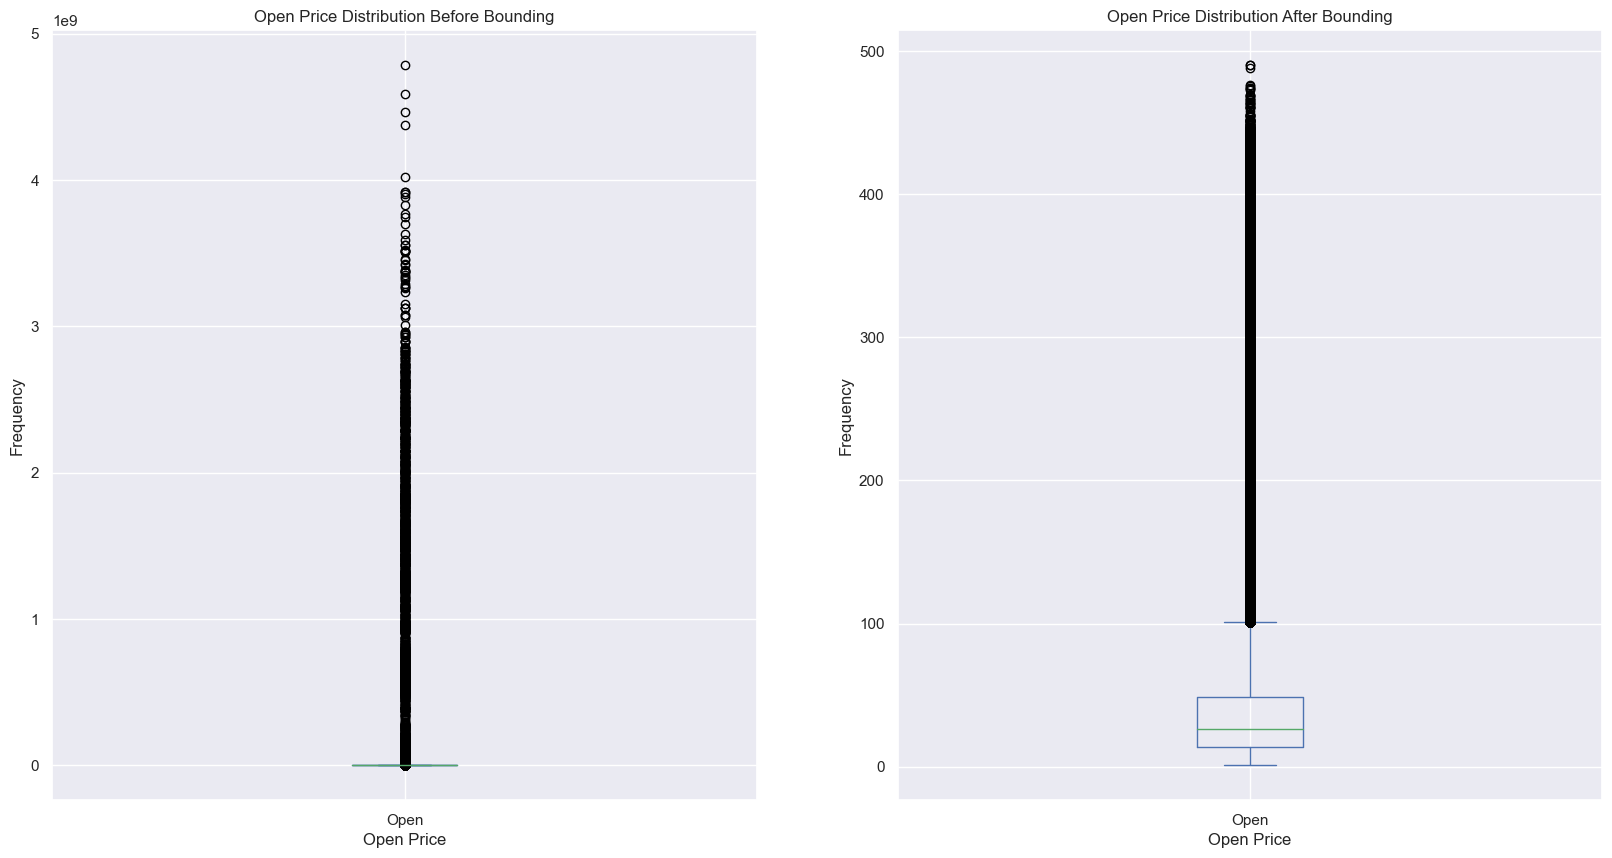

In [115]:
# Visualize the open price distribution before and after bounding
from eda import plot_open_boxes
fig, ax = plot_open_boxes(data.copy(), bounded_data.copy())
plt.show()


In [87]:
# Visualize the number of stocks by sector
from eda import plot_sector_distribution
plot = plot_sector_distribution(bounded_data)
plot.show()

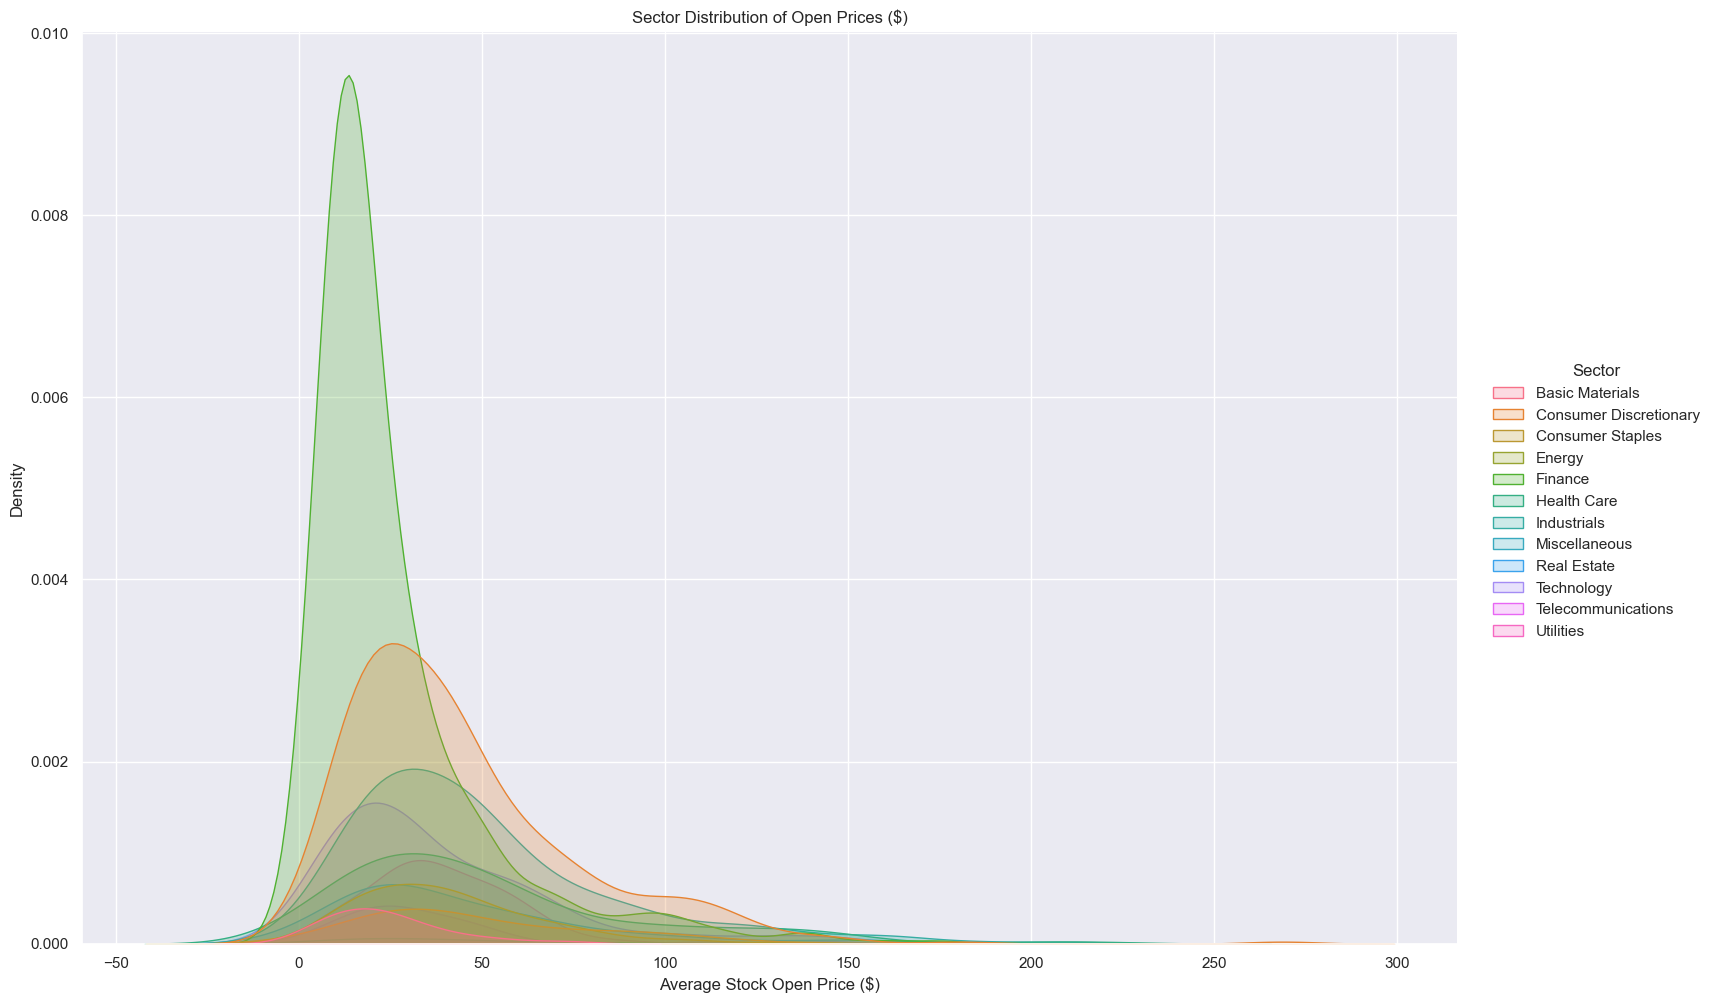

In [95]:
# Visualize the distribution average open pirces by sector
from eda import plot_sector_value_distribution
plot = plot_sector_value_distribution(bounded_data)
plt.show()

## Feature Engineering

## Comparing Models

## Implementation

## Model Tuning

## Evaluation